Please download these packages if you haven't downloaded them before:
**pandas, numpy, sklearn, keras, matplotlib**

### Download Data From Kaggle

In [0]:
#please run this cell first before upload the files!!
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

#please upload the file downloaded from your Kaggle API
#see this website for more details: Easiest way to download kaggle data in Google Colab
# https://www.kaggle.com/general/74235
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"guanmiao","key":"9234316862036e5b9b339564f2f611b7"}'}

In [0]:
# download ntu-qbs-assignment-2 data
!cp kaggle.json ~/.kaggle/
!kaggle competitions download -c ntu-qbs-assignment-2
!ls

 63% 36.0M/57.5M [00:00<00:00, 59.9MB/s]
100% 57.5M/57.5M [00:00<00:00, 145MB/s] 
 40% 9.00M/22.5M [00:00<00:00, 87.3MB/s]
100% 22.5M/22.5M [00:00<00:00, 144MB/s] 
 92% 236M/256M [00:01<00:00, 144MB/s]
100% 256M/256M [00:01<00:00, 156MB/s]
 44% 11.0M/24.8M [00:00<00:00, 51.7MB/s]
100% 24.8M/24.8M [00:00<00:00, 82.8MB/s]
  0% 0.00/823k [00:00<?, ?B/s]
100% 823k/823k [00:00<00:00, 114MB/s]
 81% 89.0M/110M [00:00<00:00, 166MB/s]
100% 110M/110M [00:00<00:00, 203MB/s] 
 63% 33.0M/52.1M [00:00<00:00, 119MB/s]
100% 52.1M/52.1M [00:00<00:00, 174MB/s]
kaggle.json	test_categorical.csv.zip  train_categorical.csv.zip
sample.csv.zip	test_date.csv.zip	  train_date.csv.zip
sample_data	test_numeric.csv.zip	  train_numeric.csv.zip


In [0]:
# unzip all the data
!apt-get install p7zip-full

!unzip /content/test_numeric.csv.zip -d /content/data
!unzip /content/test_date.csv.zip -d /content/data
!unzip /content/test_categorical.csv.zip -d /content/data
!unzip /content/train_numeric.csv.zip -d /content/data
!unzip /content/train_date.csv.zip -d /content/data
!unzip /content/train_categorical.csv.zip -d /content/data

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
Archive:  /content/test_numeric.csv.zip
  inflating: /content/data/test_numeric.csv  
Archive:  /content/test_date.csv.zip
  inflating: /content/data/test_date.csv  
Archive:  /content/test_categorical.csv.zip
  inflating: /content/data/test_categorical.csv  
Archive:  /content/train_numeric.csv.zip
  inflating: /content/data/train_numeric.csv  
Archive:  /content/train_date.csv.zip
  inflating: /content/data/train_date.csv  
Archive:  /content/train_categorical.csv.zip
  inflating: /content/data/train_categorical.csv  


# Loading Data

In [0]:
import pandas as pd
import numpy as np 

### Numeric data

In [0]:
test_numeric=pd.read_csv('/content/data/test_numeric.csv').astype('float32')

train_data=pd.read_csv('/content/data/train_numeric.csv').astype('float32')

### Date data

In [0]:
train_date = pd.read_csv('/content/data/train_date.csv').astype('float32')

test_date = pd.read_csv('/content/data/test_date.csv').astype('float32')

### Categorical data

I didn't put the code (it is really complicated and need to use a lots of RAM and time) about how I split the categorical data into 9 files and do PCA to reduce the columns in this file since I found it not helpful to put this PCA data in the model. 
Therefore in the end, I delete the categorical data. If you are interested in how to do PCA with categorical data, you can ask me.

#Training Data Preprocessing

*   For numeric data, I just standarize it.
*   For date data, I group the data by the S value in their columns name (eg: same S0), and only select the first column of each group to be the train data.

### Numeric data preprocessing (training)

In [0]:
#split the numeric data into train_data and train_targets(Response:1,0)
train_data = train_data.reset_index().drop(columns = "index")
train_targets = train_data["Response"]
train_data = train_data.drop(columns = "Response")
answer = train_targets

In [0]:
#using Robustscaler to standarize the data 
#Robustscaler removes the median and scales the data according to the quantile range
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler()
train_data = transformer.fit_transform(train_data)
train_data = pd.DataFrame(train_data)
#fill NA with 0
for c in train_data.columns: #fillna columns by columns to avoid RAM crushed
  print("Process: " + str(c))
  train_data[c] = train_data[c].fillna(0)

Process: 0
Process: 1
Process: 2
Process: 3
Process: 4
Process: 5
Process: 6
Process: 7
Process: 8
Process: 9
Process: 10
Process: 11
Process: 12
Process: 13
Process: 14
Process: 15
Process: 16
Process: 17
Process: 18
Process: 19
Process: 20
Process: 21
Process: 22
Process: 23
Process: 24
Process: 25
Process: 26
Process: 27
Process: 28
Process: 29
Process: 30
Process: 31
Process: 32
Process: 33
Process: 34
Process: 35
Process: 36
Process: 37
Process: 38
Process: 39
Process: 40
Process: 41
Process: 42
Process: 43
Process: 44
Process: 45
Process: 46
Process: 47
Process: 48
Process: 49
Process: 50
Process: 51
Process: 52
Process: 53
Process: 54
Process: 55
Process: 56
Process: 57
Process: 58
Process: 59
Process: 60
Process: 61
Process: 62
Process: 63
Process: 64
Process: 65
Process: 66
Process: 67
Process: 68
Process: 69
Process: 70
Process: 71
Process: 72
Process: 73
Process: 74
Process: 75
Process: 76
Process: 77
Process: 78
Process: 79
Process: 80
Process: 81
Process: 82
Process: 83
Pr

### Date data preprocessing (training)

In [0]:
train_date.describe()
#from the table, we can find that the columns with same SX almost have same count, mean and std

,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,L0_S0_D19,L0_S0_D21,L0_S0_D23,L0_S1_D26,L0_S1_D30,L0_S2_D34,L0_S2_D38,L0_S2_D42,L0_S2_D46,L0_S2_D50,L0_S2_D54,L0_S2_D58,L0_S2_D62,L0_S2_D66,L0_S3_D70,L0_S3_D74,L0_S3_D78,L0_S3_D82,L0_S3_D86,L0_S3_D90,L0_S3_D94,L0_S3_D98,L0_S3_D102,L0_S4_D106,L0_S4_D111,L0_S5_D115,L0_S5_D117,L0_S6_D120,L0_S6_D124,L0_S6_D127,...,L3_S45_D4131,L3_S45_D4133,L3_S46_D4135,L3_S47_D4140,L3_S47_D4145,L3_S47_D4150,L3_S47_D4155,L3_S47_D4160,L3_S47_D4165,L3_S47_D4170,L3_S47_D4175,L3_S47_D4180,L3_S47_D4185,L3_S47_D4190,L3_S48_D4194,L3_S48_D4195,L3_S48_D4197,L3_S48_D4199,L3_S48_D4201,L3_S48_D4203,L3_S48_D4205,L3_S49_D4208,L3_S49_D4213,L3_S49_D4218,L3_S49_D4223,L3_S49_D4228,L3_S49_D4233,L3_S49_D4238,L3_S50_D4242,L3_S50_D4244,L3_S50_D4246,L3_S50_D4248,L3_S50_D4250,L3_S50_D4252,L3_S50_D4254,L3_S51_D4255,L3_S51_D4257,L3_S51_D4259,L3_S51_D4261,L3_S51_D4263
count,828623.00000,471457.000000,471457.000000,471457.000000,471457.000000,471457.000000,471457.000000,471457.000000,471457.000000,471457.000000,471457.000000,471457.000000,471457.000000,471470.000000,471472.000000,237966.000000,237966.000000,237966.000000,237966.000000,237966.000000,237966.000000,237966.000000,237966.000000,237966.000000,233915.000000,233915.000000,233915.000000,233915.000000,233915.000000,233915.000000,233915.000000,233915.000000,233915.000000,234741.000000,234709.000000,237364.000000,237364.000000,237156.000000,237156.000000,237156.000000,...,41970.000000,41970.000000,0.0,41987.000000,41987.000000,41987.000000,41987.000000,41987.000000,41987.000000,41987.000000,41987.000000,41987.000000,41987.000000,41987.000000,41966.000000,41966.000000,41966.000000,41966.000000,41966.000000,41966.000000,41966.000000,20762.000000,20762.000000,20768.000000,20768.000000,20768.000000,20768.000000,20768.000000,21268.000000,21268.000000,21268.000000,21268.000000,21268.000000,21268.000000,21268.000000,41915.000000,41915.000000,41915.000000,41915.000000,41915.000000
mean,414337.96875,881.974121,881.974121,881.974121,881.974121,881.974121,881.974121,881.974121,881.974121,881.974121,881.974121,881.974121,881.974121,881.938293,881.938904,883.031311,883.031311,883.031311,883.031311,883.031311,883.031311,883.031311,883.031311,883.031311,881.064026,881.064026,881.064026,881.064026,881.064026,881.064026,881.064026,881.064026,881.064026,885.375732,885.394043,878.760254,878.760254,882.481750,882.481750,882.481750,...,1020.799438,1020.799438,NaN,1020.917603,1020.917603,1020.917603,1020.917603,1020.917603,1020.917603,1020.917603,1020.917603,1020.917603,1020.917603,1020.917603,1020.954590,1020.954590,1020.954590,1020.954590,1020.954590,1020.954590,1020.954590,1023.342651,1023.342651,1023.325317,1023.325317,1023.325317,1023.325317,1023.325317,1018.359985,1018.359985,1018.359985,1018.359985,1018.359985,1018.359985,1018.359985,1022.234924,1022.234924,1022.234924,1022.234924,1022.234924
std,239173.37500,506.457062,506.457062,506.457062,506.457062,506.457062,506.457062,506.457062,506.457062,506.457062,506.457062,506.457062,506.457062,506.458832,506.459076,506.850403,506.850403,506.850403,506.850403,506.850403,506.850403,506.850403,506.850403,506.850403,506.383911,506.383911,506.383911,506.383911,506.383911,506.383911,506.383911,506.383911,506.383911,505.272278,505.286682,507.853333,507.853333,506.241058,506.241058,506.241058,...,435.283966,435.283966,NaN,435.236206,435.236206,435.236206,435.236206,435.236206,435.236206,435.236206,435.236206,435.236206,435.236206,435.236206,435.262817,435.262817,435.262817,435.262817,435.262817,435.262817,435.262817,435.552917,435.552917,435.555206,435.555206,435.555206,435.555206,435.555206,434.946533,434.946533,434.946533,434.946533,434.946533,434.946533,434.946533,434.489258,434.489258,434.489258,434.489258,434.489258
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0

In [0]:
#transform columns name from "LX_SX_DX" to become "SX"
date_lst = list(train_date.columns)
date_lst = date_lst[1:] #data_lst[0] is ID, so I del it
S = []
for i in range(0,len(date_lst)-1):
  S.append(date_lst[i].split("_")[1]) #split the LX_SX_DX into [LX, SX, DX] and only use SX (in [1])

In [0]:
#each group (Station) taking only one column
date_part = pd.DataFrame()
for i in range(0,52):
  print("Process S" + str(i))
  temp = train_date[list(train_date.columns)[S.index("S" + str(i))+1]] #use index to find the location of the first columns named SX
  print("Concat S" + str(i))
  date_part = pd.concat((date_part, temp), axis = 1) #merge columns

Process S0
Concat S0
Process S1
Concat S1
Process S2
Concat S2
Process S3
Concat S3
Process S4
Concat S4
Process S5
Concat S5
Process S6
Concat S6
Process S7
Concat S7
Process S8
Concat S8
Process S9
Concat S9
Process S10
Concat S10
Process S11
Concat S11
Process S12
Concat S12
Process S13
Concat S13
Process S14
Concat S14
Process S15
Concat S15
Process S16
Concat S16
Process S17
Concat S17
Process S18
Concat S18
Process S19
Concat S19
Process S20
Concat S20
Process S21
Concat S21
Process S22
Concat S22
Process S23
Concat S23
Process S24
Concat S24
Process S25
Concat S25
Process S26
Concat S26
Process S27
Concat S27
Process S28
Concat S28
Process S29
Concat S29
Process S30
Concat S30
Process S31
Concat S31
Process S32
Concat S32
Process S33
Concat S33
Process S34
Concat S34
Process S35
Concat S35
Process S36
Concat S36
Process S37
Concat S37
Process S38
Concat S38
Process S39
Concat S39
Process S40
Concat S40
Process S41
Concat S41
Process S42
Concat S42
Process S43
Concat S43
Process 

In [0]:
#using Robustscaler to standarize the data 
date_part = transformer.fit_transform(date_part)
date_part = pd.DataFrame(date_part)
#fill NA columns by columns to avoid RAM crushed
for c in date_part.columns: 
  print("Process: " + str(c))
  date_part[c] = date_part[c].fillna(0) #fill na with 0

/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:995: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:1372: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


Process: 0
Process: 1
Process: 2
Process: 3
Process: 4
Process: 5
Process: 6
Process: 7
Process: 8
Process: 9
Process: 10
Process: 11
Process: 12
Process: 13
Process: 14
Process: 15
Process: 16
Process: 17
Process: 18
Process: 19
Process: 20
Process: 21
Process: 22
Process: 23
Process: 24
Process: 25
Process: 26
Process: 27
Process: 28
Process: 29
Process: 30
Process: 31
Process: 32
Process: 33
Process: 34
Process: 35
Process: 36
Process: 37
Process: 38
Process: 39
Process: 40
Process: 41
Process: 42
Process: 43
Process: 44
Process: 45
Process: 46
Process: 47
Process: 48
Process: 49
Process: 50
Process: 51


### Combine numeric and date data (training)

In [0]:
train_data = pd.concat((train_data, date_part), axis = 1).astype("float32")

---

# Test Data Preprocessing (like training data)

*   For numeric data, I just standarize it.
*   For date data, I group the data by the S value in their columns name (eg: same S0), and only select the first column of each group to be the train data.

### Numeric data preprocessing (test)

In [0]:
#using Robustscaler to standarize the data 
from sklearn.preprocessing import StandardScaler
transformer = RobustScaler()
test_numeric = transformer.fit_transform(test_numeric)
test_numeric = pd.DataFrame(test_numeric)
#fill NA columns by columns to avoid RAM crushed 
for c in test_numeric.columns:
  print("Process: " + str(c))
  test_numeric[c] = test_numeric[c].fillna(0) #fill na with 0

Process: 0
Process: 1
Process: 2
Process: 3
Process: 4
Process: 5
Process: 6
Process: 7
Process: 8
Process: 9
Process: 10
Process: 11
Process: 12
Process: 13
Process: 14
Process: 15
Process: 16
Process: 17
Process: 18
Process: 19
Process: 20
Process: 21
Process: 22
Process: 23
Process: 24
Process: 25
Process: 26
Process: 27
Process: 28
Process: 29
Process: 30
Process: 31
Process: 32
Process: 33
Process: 34
Process: 35
Process: 36
Process: 37
Process: 38
Process: 39
Process: 40
Process: 41
Process: 42
Process: 43
Process: 44
Process: 45
Process: 46
Process: 47
Process: 48
Process: 49
Process: 50
Process: 51
Process: 52
Process: 53
Process: 54
Process: 55
Process: 56
Process: 57
Process: 58
Process: 59
Process: 60
Process: 61
Process: 62
Process: 63
Process: 64
Process: 65
Process: 66
Process: 67
Process: 68
Process: 69
Process: 70
Process: 71
Process: 72
Process: 73
Process: 74
Process: 75
Process: 76
Process: 77
Process: 78
Process: 79
Process: 80
Process: 81
Process: 82
Process: 83
Pr

### Date data prepeocessing (test)

In [0]:
#transform columns name from "LX_SX_DX" to become "SX"
date_lst = list(test_date.columns)
date_lst = date_lst[1:]
S = []
for i in range(0,len(date_lst)-1):
  S.append(date_lst[i].split("_")[1]) #split the LX_SX_DX into [LX, SX, DX] and only use SX (in [1])

In [0]:
#each Station taking one column
date_part_test = pd.DataFrame()
for i in range(0,52):
  print("Process S" + str(i))
  temp = test_date[list(test_date.columns)[S.index("S" + str(i))+1]] #use index to find the location of the first columns named SX
  print("Concat S" + str(i))
  date_part_test = pd.concat((date_part_test, temp), axis = 1) #merge columns

Process S0
Concat S0
Process S1
Concat S1
Process S2
Concat S2
Process S3
Concat S3
Process S4
Concat S4
Process S5
Concat S5
Process S6
Concat S6
Process S7
Concat S7
Process S8
Concat S8
Process S9
Concat S9
Process S10
Concat S10
Process S11
Concat S11
Process S12
Concat S12
Process S13
Concat S13
Process S14
Concat S14
Process S15
Concat S15
Process S16
Concat S16
Process S17
Concat S17
Process S18
Concat S18
Process S19
Concat S19
Process S20
Concat S20
Process S21
Concat S21
Process S22
Concat S22
Process S23
Concat S23
Process S24
Concat S24
Process S25
Concat S25
Process S26
Concat S26
Process S27
Concat S27
Process S28
Concat S28
Process S29
Concat S29
Process S30
Concat S30
Process S31
Concat S31
Process S32
Concat S32
Process S33
Concat S33
Process S34
Concat S34
Process S35
Concat S35
Process S36
Concat S36
Process S37
Concat S37
Process S38
Concat S38
Process S39
Concat S39
Process S40
Concat S40
Process S41
Concat S41
Process S42
Concat S42
Process S43
Concat S43
Process 

In [0]:
#using Robustscaler to standarize the data  
date_part_test = transformer.fit_transform(date_part_test)
date_part_test = pd.DataFrame(date_part_test)
#fill NA columns by columns to avoid RAM crushed 
for c in date_part_test.columns:
  print("Process: " + str(c))
  date_part_test[c] = date_part_test[c].fillna(0) #fill na with 0

Process: 0
Process: 1
Process: 2
Process: 3
Process: 4
Process: 5
Process: 6
Process: 7
Process: 8
Process: 9
Process: 10
Process: 11
Process: 12
Process: 13
Process: 14
Process: 15
Process: 16
Process: 17
Process: 18
Process: 19
Process: 20
Process: 21
Process: 22
Process: 23
Process: 24
Process: 25
Process: 26
Process: 27
Process: 28
Process: 29
Process: 30
Process: 31
Process: 32
Process: 33
Process: 34
Process: 35
Process: 36
Process: 37
Process: 38
Process: 39
Process: 40
Process: 41
Process: 42
Process: 43
Process: 44
Process: 45
Process: 46
Process: 47
Process: 48
Process: 49
Process: 50
Process: 51


### Combine numeric and date data (test)

In [0]:
test_numeric = pd.concat((test_numeric, date_part_test), axis = 1)

---

# MODEL

In [0]:
train_data.shape #show the data shape

(828623, 1021)

In [0]:
train_targets #show the 1,0 data

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
828618    0.0
828619    0.0
828620    0.0
828621    0.0
828622    0.0
Name: Response, Length: 828623, dtype: float32

In [0]:
#split data into training and validation set
x_val = train_data[0:50000]
partial_x_train = train_data[50000:]
y_val = train_targets[0:50000]
partial_y_train = train_targets[50000:]

In [0]:
#define a function to calculate MCC
import keras.backend as K 
def matthews_correlation(y_true, y_pred):
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))
    y_pred_neg = 1 - y_pred_pos

    y_pos = K.round(K.clip(y_true, 0, 1))
    y_neg = 1 - y_pos

    tp = K.sum(y_pos * y_pred_pos)
    tn = K.sum(y_neg * y_pred_neg)

    fp = K.sum(y_neg * y_pred_pos)
    fn = K.sum(y_pos * y_pred_neg)

    numerator = (tp * tn - fp * fn)
    denominator = K.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

    return numerator / (denominator+ K.epsilon())

# https://www.coder.work/article/376682

Using TensorFlow backend.


In [0]:
#build the model
#add regulation to avoid overfitting
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.layers import Dropout
from keras import regularizers
from keras.layers import BatchNormalization
def make_model(num):
    model = models.Sequential()
    model.add(layers.Dense(256, activation='relu', kernel_regularizer = regularizers.l2(0.001), input_shape=(num,)))
    model.add(BatchNormalization()) 
    model.add(Dropout(p=0.5))
    model.add(layers.Dense(64, activation='relu', kernel_regularizer = regularizers.l2(0.001)))
    model.add(BatchNormalization()) 
    model.add(Dropout(p=0.3))
    model.add(layers.Dense(8, activation='relu'))
    model.add(BatchNormalization()) 
    model.add(Dropout(p=0.3))
    model.add(layers.Dense(1, activation="sigmoid"))
    rms = optimizers.rmsprop(lr=0.005)
    model.compile(optimizer = rms, 
                  loss= 'mse', 
                  metrics = ["accuracy", matthews_correlation],)
    return model

In [0]:
#start to train
#using big batch size to avoid that answer "1" is not included in each batch
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2, mode='max') #using callbacks to avoid running too much epoch
model = make_model(train_data.shape[1])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=10000, 
                    validation_data=(x_val, y_val),
                    class_weight = {0: 1., #using class_weight to deal with imbalanced problem
                                    1: 80.},
                    callbacks=[early_stopping])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.5)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.3)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.3)`


Train on 778623 samples, validate on 50000 samples
Epoch 1/50
778623/778623 [==============================] - 42s 53us/step - loss: 0.4001 - accuracy: 0.8975 - matthews_correlation: 0.0249 - val_loss: 0.1234 - val_accuracy: 0.9925 - val_matthews_correlation: 0.0380
Epoch 2/50
778623/778623 [==============================] - 41s 53us/step - loss: 0.3343 - accuracy: 0.9628 - matthews_correlation: 0.0337 - val_loss: 0.1068 - val_accuracy: 0.9938 - val_matthews_correlation: 0.0607
Epoch 3/50
778623/778623 [==============================] - 41s 52us/step - loss: 0.3304 - accuracy: 0.9693 - matthews_correlation: 0.0342 - val_loss: 0.1126 - val_accuracy: 0.9937 - val_matthews_correlation: 0.1022
Epoch 4/50
778623/778623 [==============================] - 41s 52us/step - loss: 0.3272 - accuracy: 0.9689 - matthews_correlation: 0.0402 - val_loss: 0.1083 - val_accuracy: 0.9936 - val_matthews_correlation: 0.1304
Epoch 5/50
778623/778623 [==============================] - 41s 52us/step - loss: 0.3

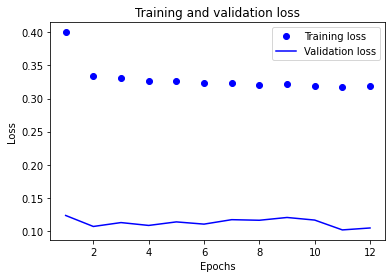

In [0]:
#loss result ***if the figure doesn't show up, please run again
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

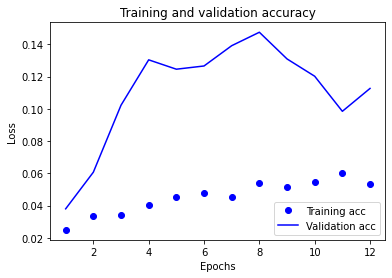

In [0]:
#accuracy result
plt.clf()
acc = history.history['matthews_correlation']
val_acc = history.history['val_matthews_correlation']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Prediction

In [0]:
predictions = model.predict_classes(test_numeric) #directly predict 1,0 using predict_classes

In [0]:
bool_list = list(map(bool,predictions)) #transform 1, 0 into True, False

In [0]:
#rename the columns
output = pd.DataFrame()
output["Response"] = bool_list

In [0]:
#export answer
#output.to_csv("prediction_25.csv")